In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [87]:
import pandas as pd
df = pd.read_csv(r"dataset//names.csv")

In [88]:
df.head()

,gender,eng,count,pr_fa,abjad,pr_en,origin,civil_registration_approved
0,دختر,sana,76899.0,ثنا,551.0,sanā,عربی,تایید شده
1,دختر,samin,25615.0,ثمين,600.0,samin,عربی,تایید شده
2,دختر,sorayya,159065.0,ثريا,711.0,sorayyā,عربی,تایید شده
3,دختر,samar,2294.0,ثمر,740.0,samar,عربی,تایید شده
4,دختر,samina,2091.0,ثمينا,601.0,saminā,"فارسی , عربی",تایید شده


In [89]:
len(df)

8888

In [90]:
names = df["pr_fa"]

In [91]:
names.isna().sum(axis=0)

9

In [92]:
names = names.dropna()

In [93]:
for name in names :
    if name[-1] == " ":
        name = name[:-1]

In [94]:
chars = list(set(''.join(names)))
ctoi = {c:i+1 for i, c in enumerate(chars)}
ctoi['.'] = 0
itoc = {i:c for c,i in ctoi.items()}

In [95]:
print(ctoi)

{'ط': 1, 'ؤ': 2, 'ک': 3, 'ه': 4, 'ذ': 5, 'ا': 6, 'ر': 7, 'ی': 8, 'چ': 9, 'ع': 10, 'أ': 11, 'ح': 12, 'ي': 13, 'ة': 14, 'ض': 15, 'ق': 16, 'آ': 17, 'ت': 18, 'پ': 19, 'ف': 20, 'ج': 21, 'ب': 22, 'ك': 23, 'م': 24, 'ز': 25, ' ': 26, 'د': 27, 'ء': 28, 'س': 29, 'ص': 30, 'ث': 31, 'ظ': 32, 'ژ': 33, 'ل': 34, 'ن': 35, 'ش': 36, 'خ': 37, 'غ': 38, 'و': 39, 'گ': 40, 'ئ': 41, '.': 0}


In [96]:
block_size = 5
X, Y = [], []
count = 0
for n in names :
    n = n + '.'
    x = block_size * [0]
    for ch in n :
        count = count + 1
        ix = ctoi[ch]
        X.append(x)
        Y.append(ix)
        x = x[1:] + [ix]
        
    print(x)
    print(''.join(itoc[c] for c in x))

[0, 31, 35, 6, 0]
.ثنا.
[31, 24, 13, 35, 0]
ثمين.
[31, 7, 13, 6, 0]
ثريا.
[0, 31, 24, 7, 0]
.ثمر.
[24, 13, 35, 6, 0]
مينا.
[31, 6, 24, 7, 0]
ثامر.
[24, 13, 35, 4, 0]
مينه.
[31, 6, 24, 35, 0]
ثامن.
[39, 22, 6, 35, 0]
وبان.
[31, 6, 16, 22, 0]
ثاقب.
[6, 34, 34, 4, 0]
الله.
[24, 13, 34, 4, 0]
ميله.
[6, 22, 18, 4, 0]
ابته.
[31, 24, 7, 4, 0]
ثمره.
[0, 31, 24, 35, 0]
.ثمن.
[35, 6, 13, 6, 0]
نايا.
[24, 13, 34, 6, 0]
ميلا.
[6, 34, 34, 4, 0]
الله.
[6, 35, 8, 4, 0]
انیه.
[31, 7, 39, 18, 0]
ثروت.
[35, 6, 40, 39, 0]
ناگو.
[39, 8, 22, 4, 0]
ویبه.
[24, 6, 35, 4, 0]
مانه.
[17, 7, 6, 27, 0]
آراد.
[7, 18, 13, 35, 0]
رتين.
[17, 29, 35, 6, 0]
آسنا.
[39, 13, 35, 6, 0]
وينا.
[8, 4, 6, 35, 0]
یهان.
[17, 7, 13, 6, 0]
آريا.
[7, 29, 6, 24, 0]
رسام.
[0, 17, 39, 6, 0]
.آوا.
[7, 39, 13, 35, 0]
روين.
[17, 35, 8, 6, 0]
آنیا.
[17, 39, 13, 35, 0]
آوين.
[17, 7, 6, 25, 0]
آراز.
[7, 3, 6, 35, 0]
رکان.
[35, 13, 29, 6, 0]
نيسا.
[17, 7, 18, 6, 0]
آرتا.
[7, 24, 13, 35, 0]
رمين.
[13, 34, 13, 35, 0]
يلين.
[17, 7, 13, 35, 0]
آر

In [97]:
import torch
X = torch.tensor(X)
Y = torch.tensor(Y)

In [98]:
NeuronCount1 = 2
charsLen = len(ctoi)

In [99]:
device = torch.device('cuda')

W0 = torch.randn(charsLen, NeuronCount1) * 0.1
W0 = W0.to(device)

NeuronCount2 = 200
W1 = torch.randn((NeuronCount1 * block_size, NeuronCount2)) * 0.1
W1 = W1.to(device)
b1 = torch.randn(NeuronCount2)
b1 = b1.to(device)

emb = W0[X]
emb = emb.to(device)
emb = emb.view(-1, block_size * NeuronCount1)
emb = emb.to(device)

h = torch.tanh(emb @ W1 + b1)
h = h.to(device)

W2 = torch.randn((NeuronCount2, charsLen)) * 0.1
W2 = W2.to(device)
b2 = torch.randn(charsLen) 
b2 = b2.to(device)

parameters = [W0, W1, b1, W2, b2]

for p in parameters :
    p.requires_grad = True

lr = 4e-1
losses = []

for i in range(10000) :
    # forward pass
    emb = W0[X]
    
    h = torch.tanh(emb.view(-1, block_size * NeuronCount1) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y.to(device))
    losses.append(loss.item())
    # backward pass
    for p in parameters :
        p.grad = None
    loss.backward()
    
    if i % 100 == 0:
        print(loss.item())
    
    # update
    for p in parameters :
        p.data -= lr * p.grad

4.401765823364258
3.044329881668091
2.7597527503967285
2.7075748443603516
2.6585121154785156
2.630108118057251
2.6104660034179688
2.5957255363464355
2.5837297439575195
2.5714147090911865
2.5586023330688477
2.5460803508758545
2.5349977016448975
2.522568702697754
2.5087063312530518
2.505582809448242
2.492457866668701
2.476876735687256
2.4733383655548096
2.464815855026245
2.4597270488739014
2.447457790374756
2.436448812484741
2.4366796016693115
2.4273152351379395
2.4291062355041504
2.4110281467437744
2.4031074047088623
2.3994224071502686
2.3926308155059814
2.386831760406494
2.3848257064819336
2.377470016479492
2.375054121017456
2.366351366043091
2.3630576133728027
2.3587186336517334
2.3544163703918457
2.354431390762329
2.345262289047241
2.3384487628936768
2.337801456451416
2.3351545333862305
2.331691265106201
2.3302056789398193
2.3262217044830322
2.3205583095550537
2.320133924484253
2.312431573867798
2.3119938373565674
2.3068883419036865
2.3009114265441895
2.3002467155456543
2.29907798767

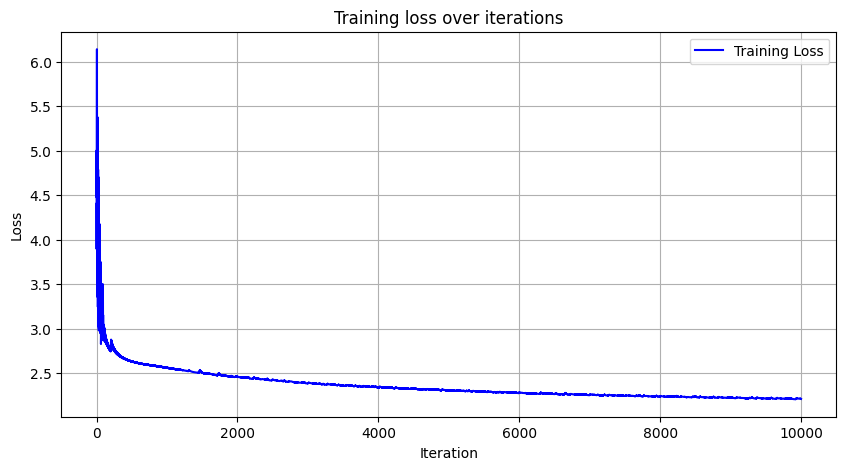

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss over iterations')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
import random
import torch
import torch.nn.functional as F

def build_name():
    word = []

    ix = random.randint(1, charsLen-1)  
    ixs = [0] * block_size
    ixs[-1] = ix 
    while ix != 0:
        x = F.one_hot(torch.tensor(ixs), num_classes=charsLen).float().to(device)  
        emb = x @ W0                                                   
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)                      
        logits = h @ W2 + b2                                           
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)
        probs = probs.view(-1)
        # print(f"Probs: {probs}")
        word.append(itoc[ix])
        ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
        ixs = ixs[1:] + [ix]

    return word

In [102]:
# Generate names and count characters
generated_names = [''.join(build_name()) for _ in range(1000)]
all_chars = ''.join(generated_names)
char_counts = pd.Series(list(all_chars)).value_counts()

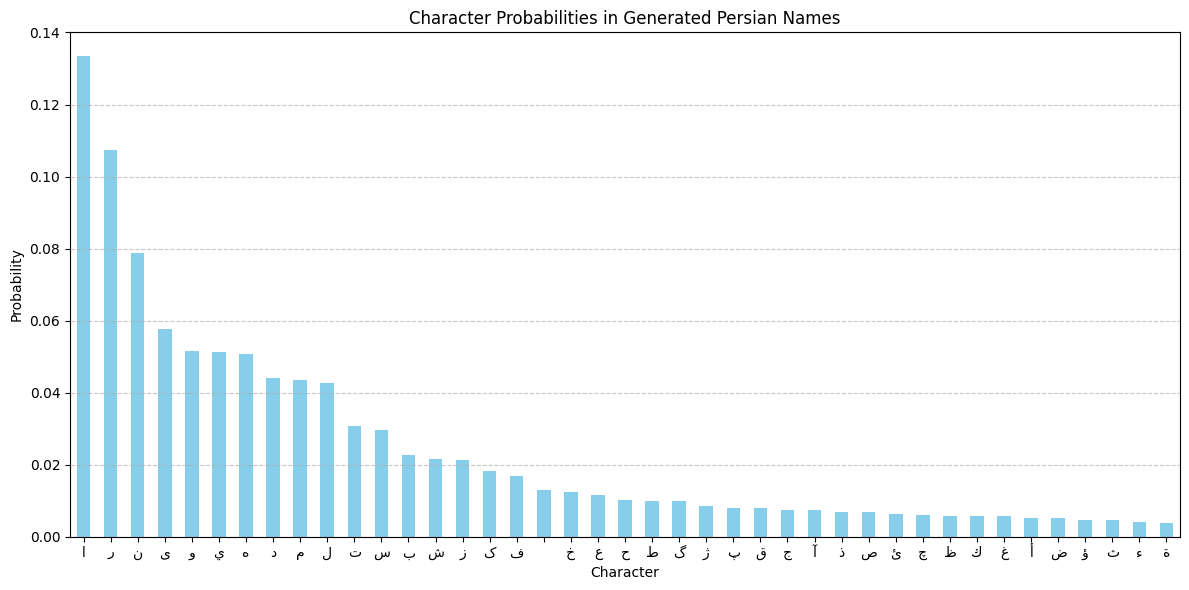

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

char_probs = char_counts / char_counts.sum()  # Normalize to get probabilities

# Plot
plt.figure(figsize=(12, 6))
char_probs.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Character Probabilities in Generated Persian Names')
plt.xlabel('Character')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [103]:
for i in range(10):
    print('' .join(build_name()))

طونوسا
قمیر
مهنر
ءديکه
هانيا
ظورین
خیمیت
قورشددا
ؤالفر
کبدبو مندی
